<a href="https://colab.research.google.com/github/AmandaGit01/Repositorio_minicurso/blob/main/minera%C3%A7%C3%A3o_de_dados_a_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minicurso: Mineração de Dados - Classificação**
Bem-vindo(a)! Neste notebook vamos explorar os principais conceitos de **classificação em mineração de dados**,
desde a teoria básica até a aplicação prática com algoritmos do `scikit-learn`.

📌 Objetivos:
- Entender o conceito de **classificação**;
- Conhecer alguns **algoritmos clássicos**;
- Aplicar na prática usando o Google Colab;
- Avaliar os resultados com métricas adequadas.



## O que é Classificação?
Classificação é uma técnica de **aprendizado supervisionado** em que o objetivo é **prever a categoria** (ou classe)
a que pertence uma observação, com base em atributos conhecidos.

📌 Exemplos de uso:
- Detectar e-mails "spam" ou "não spam";
- Diagnóstico médico (doente vs saudável);
- Reconhecimento de dígitos escritos à mão;
- Classificação de clientes (bom/mau pagador).

##Preparação do ambiente
**Instalar bibliotecas caso necessário (no Colab já vem sklearn, pandas e matplotlib):**

In [1]:
!pip install scikit-learn pandas matplotlib

##Importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Explorar o dataset
**Usaremos o famoso Iris Dataset do sklearn:**

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['classe'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##Pré-processamento:
**Nesta etapa iremos inserir de forma artificial alguns valores para demonstrar a imputação, realizaremos o teste e normalização dos dados:**

In [4]:
df_missing = df.copy()
df_missing.iloc[0,0] = np.nan
df_missing.iloc[4,2] = np.nan

print("Antes da imputação:")
print(df_missing.head())

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_missing.iloc[:, :-1])

print("\nDepois da imputação (valores ausentes substituídos pela média):")
print(X_imputed[:5])

Antes da imputação:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                NaN               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                NaN               0.2   

   classe  
0       0  
1       0  
2       0  
3       0  
4       0  

Depois da imputação (valores ausentes substituídos pela média):
[[5.84832215 3.5        1.4        0.2       ]
 [4.9        3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [4.6        3.1        1.5        0.2       ]
 [5.         3.6        3.7738255  0.2       ]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, df_missing['classe'], test_size=0.3, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Algoritmos de Classificação
**Aqui mostramos três modelos (KNN, Árvore de Decisão e Regressão Logística).**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\nModelo: {name}")
    print("Acurácia:", acc)
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Modelo: KNN
Acurácia: 1.0
Matriz de Confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Modelo: Decision Tree
Acurácia: 0.9777777777777777
Matriz de Confusão:
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0

##Comparando os modelos de classificação

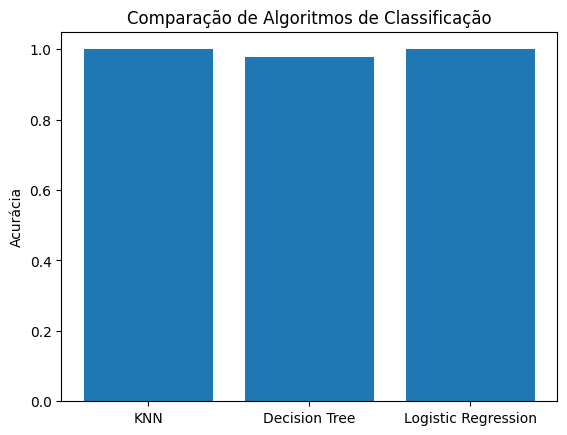

In [8]:
plt.bar(results.keys(), results.values())
plt.ylabel("Acurácia")
plt.title("Comparação de Algoritmos de Classificação")
plt.show()

## **Conclusão**

- **Classificação** é um processo de prever categorias.
- Vimos como lidar com **dados faltantes** usando imputação.
- Aplicamos três algoritmos diferentes:
  - KNN
  - Árvore de Decisão
  - Regressão Logística
- Avaliamos os modelos com **acurácia, matriz de confusão e relatório de classificação**.
- Observamos que a performance pode variar de acordo com o algoritmo e o dataset.

👉 Próximos passos: explorar outros datasets, ajustar hiperparâmetros e testar algoritmos mais avançados (SVM, Random Forest, etc).

## Segundo Dataset: Breast Cancer
Além do **Iris dataset**, vamos trabalhar também com o dataset de **Câncer de Mama** incluído no `scikit-learn`.
Este dataset é binário: prever se o tumor é **maligno (0)** ou **benigno (1)**.

In [9]:
cancer = datasets.load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

df_cancer = pd.DataFrame(X_cancer, columns=cancer.feature_names)
df_cancer['classe'] = y_cancer
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classe
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Algoritmos adicionais: SVM e Random Forest
Agora vamos incluir dois classificadores muito usados:
- **Support Vector Machine (SVM)**
- **Random Forest**

In [10]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models_extended = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results_cancer = {}

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    df_cancer.iloc[:, :-1], df_cancer['classe'], test_size=0.3, random_state=42
)

scaler_cancer = StandardScaler()
Xc_train = scaler_cancer.fit_transform(Xc_train)
Xc_test = scaler_cancer.transform(Xc_test)

for name, model in models_extended.items():
    model.fit(Xc_train, yc_train)
    y_pred = model.predict(Xc_test)
    acc = accuracy_score(yc_test, y_pred)
    results_cancer[name] = acc

    print(f"\nModelo: {name}")
    print("Acurácia:", acc)
    print("Matriz de Confusão:\n", confusion_matrix(yc_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(yc_test, y_pred))


Modelo: KNN
Acurácia: 0.9590643274853801
Matriz de Confusão:
 [[ 59   4]
 [  3 105]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Modelo: Decision Tree
Acurácia: 0.9415204678362573
Matriz de Confusão:
 [[ 60   3]
 [  7 101]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


Modelo: Logistic Regression
Acurácia: 0.9824561403508771
Matriz de Confusão:
 [[ 62   1]
 [  2 106]]
Rela

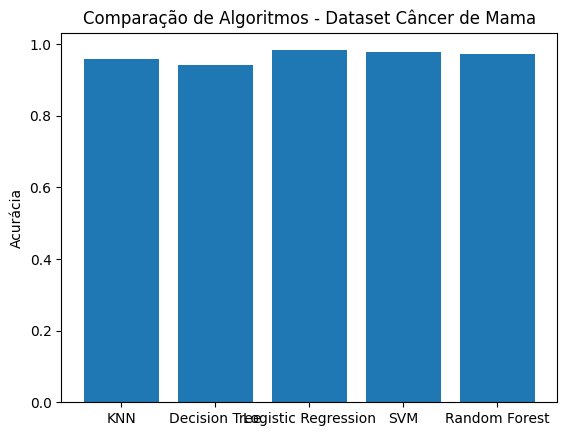

In [11]:
plt.bar(results_cancer.keys(), results_cancer.values())
plt.ylabel("Acurácia")
plt.title("Comparação de Algoritmos - Dataset Câncer de Mama")
plt.show()

## Conclusão Final
- Trabalhamos com **dois datasets**: Iris e Breast Cancer.
- Aplicamos **pré-processamento**: imputação de dados e normalização.
- Treinamos e comparamos **cinco algoritmos**:
  - KNN
  - Árvore de Decisão
  - Regressão Logística
  - SVM
  - Random Forest
- Avaliamos com métricas de **acurácia, matriz de confusão e relatório de classificação**.

